# Dados Textuais: classificação e exploração.

fonte de dados: https://www.kaggle.com/luisfredgs/imdb-ptbr

In [1]:
import pandas as pd

resenha = pd.read_csv("imdb-reviews-pt-br.csv")
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg  
1  Este é um exemplo do motivo pelo qual a maiori...       neg  
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg  
3  Nem mesmo os Beatles puderam escrever músicas ...       neg  
4  Filmes de fotos de latão não é uma palavra apr...       neg

In [2]:
from sklearn.model_selection import train_test_split

treino, teste, classe_treino, classe_teste = train_test_split(resenha.text_pt,
                                                              resenha.sentiment,
                                                              random_state = 42)

In [3]:
print("Negativa \n")
print(resenha.text_pt[189])

Negativa 

Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.


In [4]:
print("Positivo \n")
print(resenha.text_pt[49002])

Positivo 

Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos documentários mais importantes feitos para cobrir esse lugar neste período de tempo. Não Madonna não veio com a idéia de Voguing, mas é de onde ela tirou! Em vez de combater a violência uns dos outros ou em brigas de gato, o voguing permitia que as pessoas "lutassem" dentro dos confins de tudo, menos que tocassem umas às outras, o que justificaria uma desqualificação automática. Vendo este tipo de extraordinariamente talentosas / bem orquestradas "jogadas" nos clubes foi nada menos do que espetacular e todos os grandes nomes de antigamente estão aqui ... Pepper La Beija, Paris Duprée, Xtragavaganza, etc. ..tudo comemorado nos gostos de peças de época como a música de Malcom McLarens "Deep in Vogue" ... não importava quem você era, ou de onde você era porque quando você passava por aquelas portas nesse "reino mágico" de De certa forma, você se tornou parte de algo maio

In [5]:
print(resenha.sentiment.value_counts())

neg    24765
pos    24694
Name: sentiment, dtype: int64


In [6]:
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg  
1  Este é um exemplo do motivo pelo qual a maiori...       neg  
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg  
3  Nem mesmo os Beatles puderam escrever músicas ...       neg  
4  Filmes de fotos de latão não é uma palavra apr...       neg

In [7]:
classificacao = resenha["sentiment"].replace(["neg", "pos"], [0,1])

In [8]:
resenha["classificacao"] = classificacao

In [9]:
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classificacao  
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg              0  
1  Este é um exemplo do motivo pelo qual a maiori...       neg              0  
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg              0  
3  Nem mesmo os Beatles puderam escrever músicas ...       neg              0  
4  Filmes de fotos de latão não é uma palavra apr...       neg              0

In [10]:
resenha.tail()

id                                            text_en  \
49454  49456  Seeing as the vote average was pretty low, and...   
49455  49457  The plot had some wretched, unbelievable twist...   
49456  49458  I am amazed at how this movieand most others h...   
49457  49459  A Christmas Together actually came before my t...   
49458  49460  Working-class romantic drama from director Mar...   

                                                 text_pt sentiment  \
49454  Como a média de votos era muito baixa, e o fat...       pos   
49455  O enredo teve algumas reviravoltas infelizes e...       pos   
49456  Estou espantado com a forma como este filme e ...       pos   
49457  A Christmas Together realmente veio antes do m...       pos   
49458  O drama romântico da classe trabalhadora do di...       pos   

       classificacao  
49454              1  
49455              1  
49456              1  
49457              1  
49458              1

## Bag of Words: criando representações da linguagem humana.

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ["Assisti um filme ótimo", "Assisti um filme ruim"]

vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(texto)

In [12]:
vetorizar.get_feature_names()

['Assisti', 'filme', 'ruim', 'um', 'ótimo']

In [13]:
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [14]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words,
                      columns=vetorizar.get_feature_names())

In [15]:
matriz_esparsa

Assisti  filme  ruim  um  ótimo
0        1      1     0   1      1
1        1      1     1   1      0

In [16]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(resenha.text_pt)
print(bag_of_words.shape)

(49459, 50)


In [17]:
from sklearn.linear_model import LogisticRegression

def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    
    treino, teste, classe_treino, classe_teste = train_test_split(
        bag_of_words,
        texto[coluna_classificacao],                                                        random_state = 42)
        
    regressao_logistica = LogisticRegression(solver = "lbfgs")
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)



print(classificar_texto(resenha, "text_pt", "classificacao"))

0.6583097452486858


In [18]:
%matplotlib inline

from wordcloud import WordCloud

todas_palavras = ' '.join([texto for texto in resenha['text_pt']])

word_cloud = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)

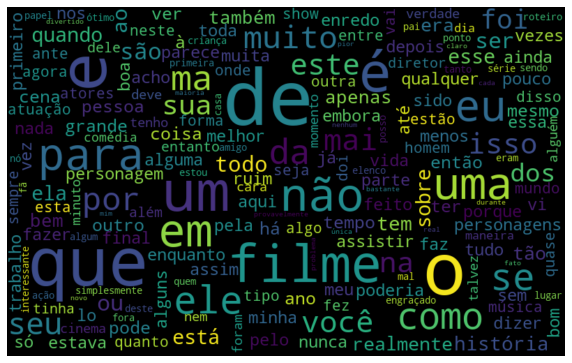

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
def word_cloud_negativa(texto, coluna_texto):
    texto_negativo = texto.query("sentiment == 'neg'")
    todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])

    word_cloud = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)

    plt.figure(figsize=(10,7))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [21]:
def word_cloud_positiva(texto, coluna_texto):
    texto_negativo = texto.query("sentiment == 'pos'")
    todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])

    word_cloud = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)

    plt.figure(figsize=(10,7))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

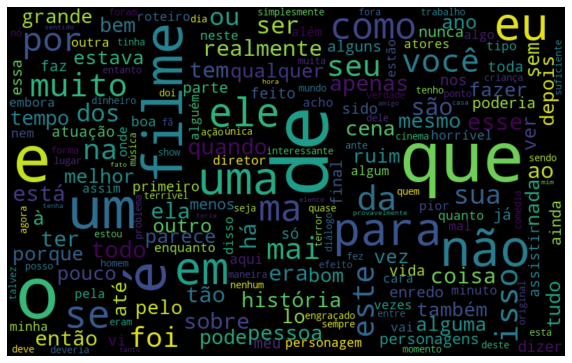

In [22]:
word_cloud_negativa(resenha, 'text_pt')

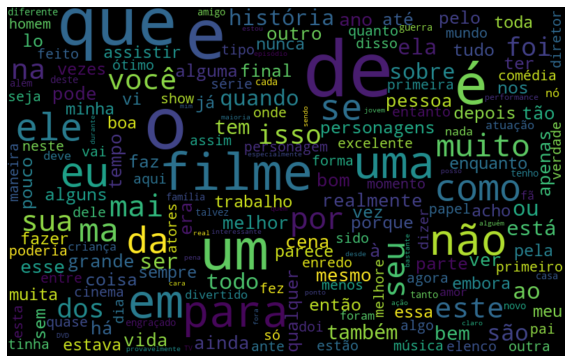

In [23]:
word_cloud_positiva(resenha, 'text_pt')

In [24]:
from nltk import tokenize, FreqDist

a = 'Bem vindo ao mundo de pln'

token_frase = tokenize.WhitespaceTokenizer().tokenize(todas_palavras)
frequencia = FreqDist(token_frase)

In [25]:
df_frequencia = pd.DataFrame({'Palavras': list(frequencia.keys()), 
                              'Frequencia': list(frequencia.values())})

df_frequencia.nlargest(columns='Frequencia', n = 10)

Palavras  Frequencia
20        de      417651
14       que      325070
42         e      299743
3          o      244881
7         um      216410
102        a      210179
45         é      192381
200       em      132778
1        uma      130888
29       não      127915

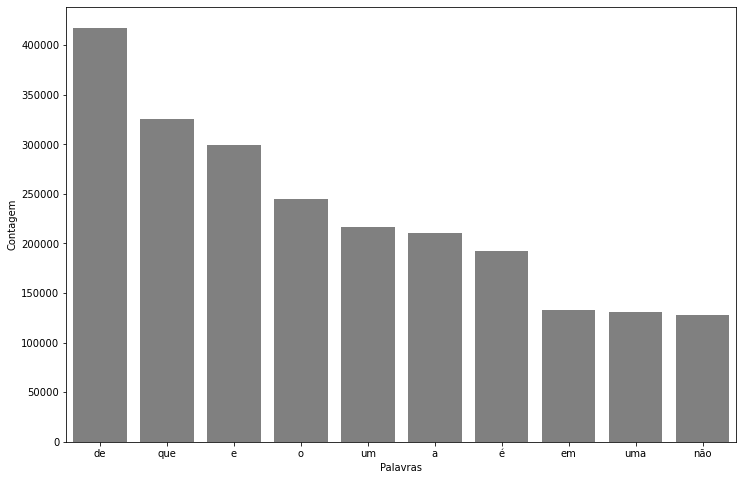

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt


def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])

    token_frase = tokenize.WhitespaceTokenizer().tokenize(todas_palavras)
    frequencia = FreqDist(token_frase)

    df_frequencia = pd.DataFrame({'Palavras': list(frequencia.keys()), 
                                'Frequencia': list(frequencia.values())})

    df_frequencia = df_frequencia.nlargest(columns='Frequencia', n = quantidade)

    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x = 'Palavras', y = 'Frequencia', color = 'gray')
    ax.set(ylabel='Contagem')

    plt.show()

pareto(resenha, 'text_pt', 10)

In [53]:
import nltk

#Removendo stopwords
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

frases_processadas = list()

for opiniao in resenha['text_pt']:
    nova_frase = list()
    palavras_texto = tokenize.WhitespaceTokenizer().tokenize(opiniao)

    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    
    frases_processadas.append(' '.join(nova_frase))

resenha['tratamento_1'] = frases_processadas

KeyboardInterrupt: 

In [28]:
classificar_texto(resenha, 'tratamento_1', 'classificacao')

0.6607359482410028

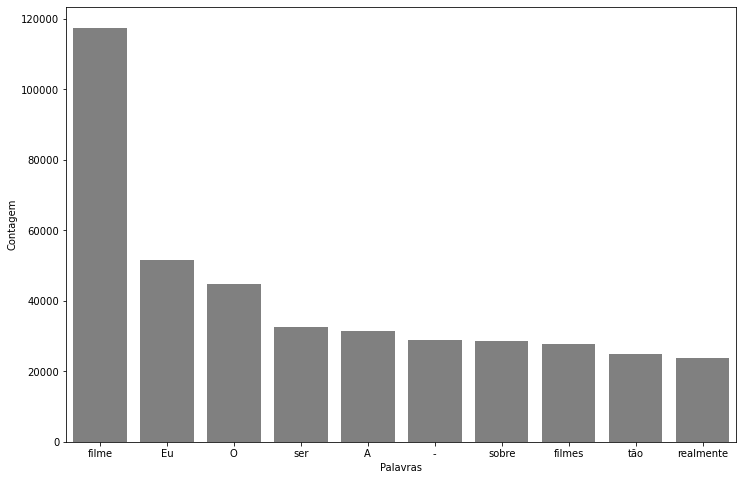

In [29]:
pareto(resenha, 'tratamento_1', 10)

In [30]:
from nltk import tokenize
from string import punctuation

token_pontuacao = tokenize.WordPunctTokenizer()

pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

pontuacao_stopwords = pontuacao + palavras_irrelevantes

frases_processadas = list()

for opiniao in resenha['tratamento_1']:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frases_processadas.append(' '.join(nova_frase))

resenha['tratamento_2']  = frases_processadas

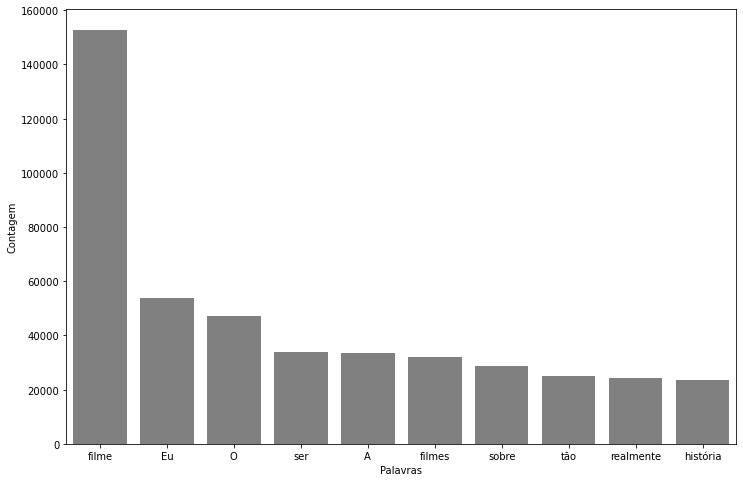

In [31]:
pareto(resenha, 'tratamento_2', 10)

In [33]:
import unidecode

sem_acentos = [unidecode.unidecode(texto) for texto in resenha['tratamento_2']]

stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

In [34]:
resenha['tratamento_3'] = sem_acentos

frases_processadas = list()

for opiniao in resenha['tratamento_3']:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frases_processadas.append(' '.join(nova_frase))

resenha['tratamento_3']  = frases_processadas

In [35]:
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classificacao  \
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg              0   
1  Este é um exemplo do motivo pelo qual a maiori...       neg              0   
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg              0   
3  Nem mesmo os Beatles puderam escrever músicas ...       neg              0   
4  Filmes de fotos de latão não é uma palavra apr...       neg              0   

                                        tratamento_1  \
0  Mais vez, Sr. Costner arrumou filme tempo nece...   
1  Este exemplo motivo maioria filmes ação mesmos...   
2  Primeiro tudo odeio raps imbecis, poderiam agi...   
3  Nem Beatles puderam escrever músicas todos gos...   
4  Filmes fotos latão palavra apropriada eles, ve...   

                                        tratamento_2  \
0  Mais vez Sr Costner arrumou filme tempo necess...   
1  Este exemplo motivo maioria filmes ação mesmos...   
2  Primeiro tudo odeio raps imbecis poderiam agir...   
3  Nem Beatles puderam escrever músicas todos gos...   
4  Filmes fotos latão palavra apropriada verdade ...   

                                        tratamento_3  
0  Mais vez Sr Costner arrumou filme tempo necess...  
1  Este exemplo motivo maioria filmes acao mesmos...  
2  Primeiro tudo odeio raps imbecis poderiam agir...  
3  Nem Beatles puderam escrever musicas todos gos...  
4  Filmes fotos latao palavra apropriada verdade ...

In [36]:
acuracia_tratamento3 = classificar_texto(resenha, 'tratamento_3', 'classificacao')
print(acuracia_tratamento3)

0.6810351799433886


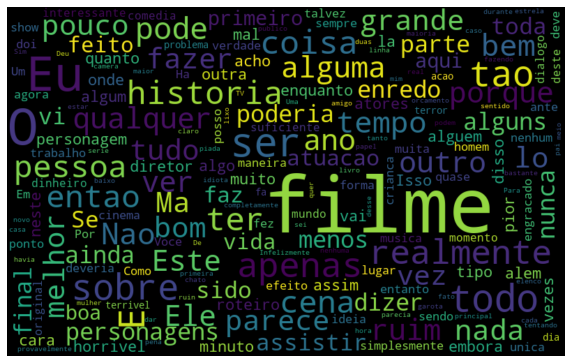

In [37]:
word_cloud_negativa(resenha, 'tratamento_3')

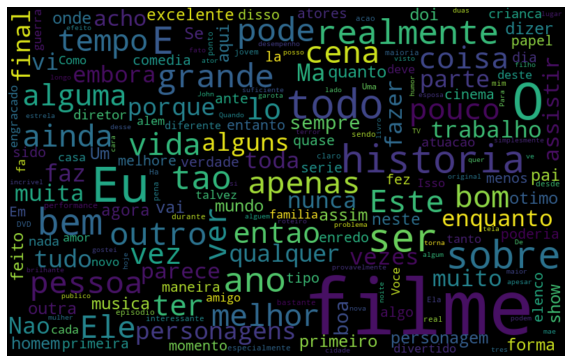

In [39]:
word_cloud_positiva(resenha, 'tratamento_3')

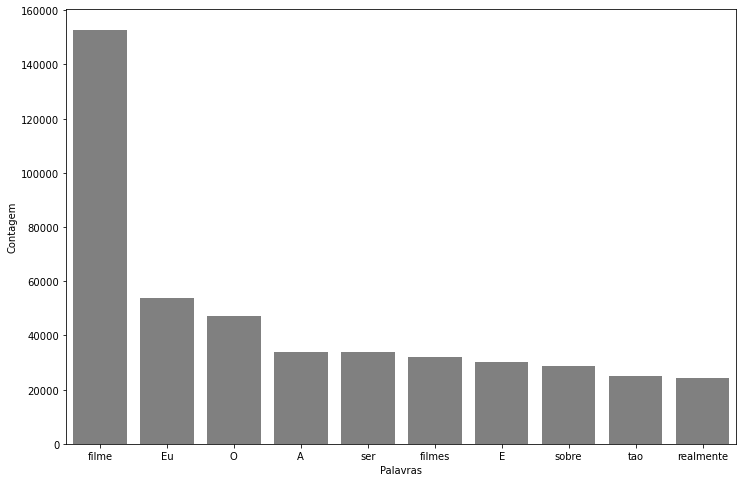

In [40]:
pareto(resenha, 'tratamento_3', 10)

In [48]:
frases_processadas = list()

for opiniao in resenha['tratamento_3']:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao.lower())
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frases_processadas.append(' '.join(nova_frase))

resenha['tratamento_4'] = frases_processadas

acuracia_tratamento4 = classificar_texto(resenha, 'tratamento_4', 'classificacao')
print(acuracia_tratamento4)
print(acuracia_tratamento3)

0.6913061059441973
0.6810351799433886


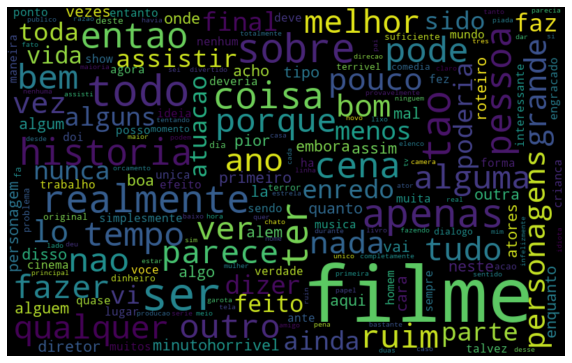

In [49]:
word_cloud_negativa(resenha, 'tratamento_4')

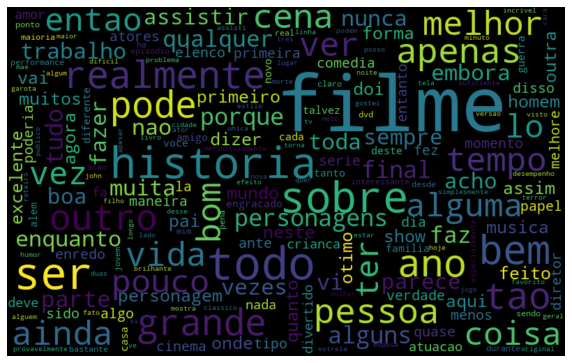

In [50]:
word_cloud_positiva(resenha, 'tratamento_4')

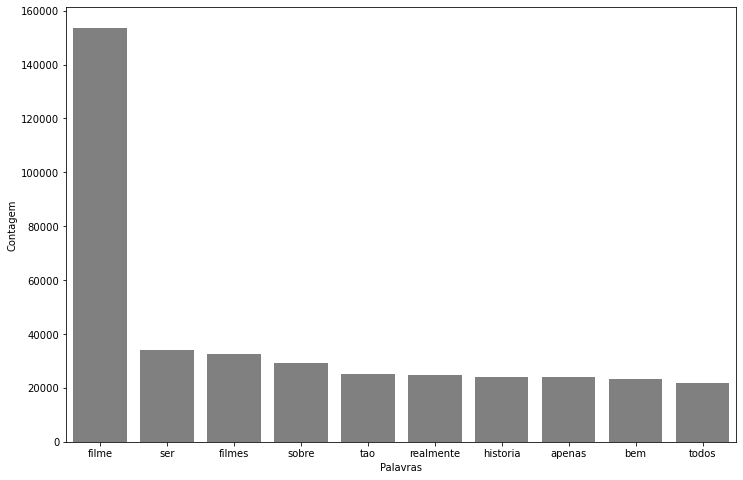

In [51]:
pareto(resenha, 'tratamento_4', 10)

In [57]:
import nltk

# Removedor de radicais
steemer = nltk.RSLPStemmer()
steemer.stem('correria')

'corr'

In [59]:
frases_processadas = list()

for opiniao in resenha['tratamento_4']:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao.lower())
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(steemer.stem(palavra))
    frases_processadas.append(' '.join(nova_frase))

resenha['tratamento_5'] = frases_processadas

In [60]:
acuracia_tratamento5 = classificar_texto(resenha, 'tratamento_5', 'classificacao')
print(acuracia_tratamento4)
print(acuracia_tratamento5)

0.6913061059441973
0.7001213101496159


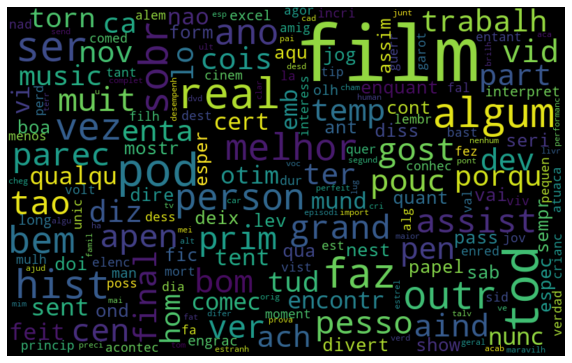

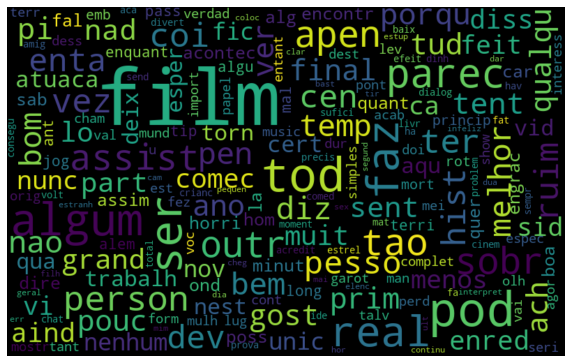

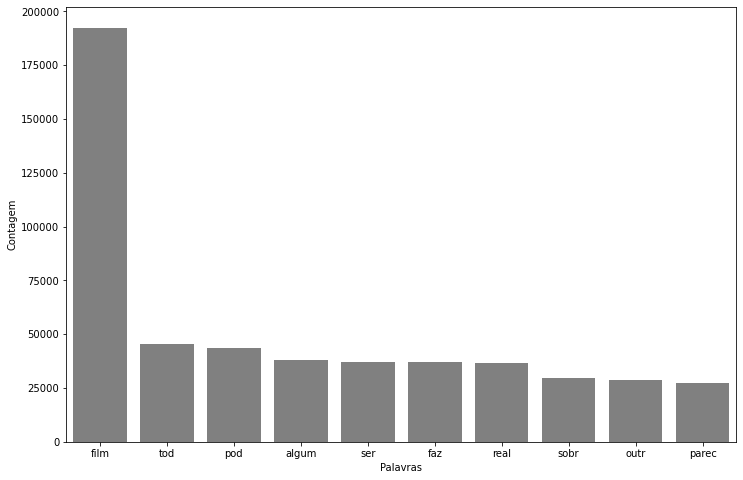

In [61]:
word_cloud_positiva(resenha, 'tratamento_5')
word_cloud_negativa(resenha, 'tratamento_5')
pareto(resenha, 'tratamento_5', 10)

# TF-IDF

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Modelo com dados nao tratados 
tfidf = TfidfVectorizer(lowercase=False, max_features=50)

tfidf_bruto = tfidf.fit_transform(resenha['text_pt'])

treino, teste, classe_treino, classe_teste = train_test_split(
    tfidf_bruto,
    resenha['classificacao'],
    random_state=42
)

regressao_logistica = LogisticRegression(solver = "lbfgs")

regressao_logistica.fit(treino, classe_treino)

acuracia_tfidf_bruto = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_bruto)

0.6600889607763849


In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Modelo com dados tratados 
tfidf = TfidfVectorizer(lowercase=False, max_features=50)

tfidf_tratados = tfidf.fit_transform(resenha['tratamento_5'])

treino, teste, classe_treino, classe_teste = train_test_split(
    tfidf_tratados,
    resenha['classificacao'],
    random_state=42
)

regressao_logistica = LogisticRegression(solver = "lbfgs")

regressao_logistica.fit(treino, classe_treino)

acuracia_tfidf_tratados = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_tratados)

0.7003639304488476
  (0, 14)	0.16155523287123208
  (0, 30)	0.1511795973779873
  (0, 46)	0.2171924481042433
  (0, 38)	0.16036460772034783
  (0, 39)	0.17610484720018388
  (0, 6)	0.18996074052250117
  (0, 16)	0.21056427484205964
  (0, 26)	0.18552571502103077
  (0, 29)	0.20406074112661612
  (0, 25)	0.1767593580826405
  (0, 34)	0.21728936937011079
  (0, 21)	0.375308382492773
  (0, 28)	0.5859021218233342
  (0, 32)	0.20866651442849654
  (0, 41)	0.20042433178285002
  (0, 15)	0.10151953880188323
  (0, 48)	0.1845137267119895
  (1, 10)	0.11745167493092833
  (1, 44)	0.08634250873259039
  (1, 1)	0.1262590026559389
  (1, 35)	0.1922921356648991
  (1, 47)	0.4700839001605306
  (1, 23)	0.12565069498486933
  (1, 5)	0.4390544853715296
  (1, 14)	0.18854635312944612
  :	:
  (49457, 3)	0.6630011954649139
  (49457, 44)	0.12016662188291166
  (49457, 35)	0.2676213222975255
  (49457, 47)	0.32711809694332555
  (49457, 14)	0.262408153949737
  (49457, 16)	0.1710058586994519
  (49457, 32)	0.16946462788349032
  (4945

In [74]:
from nltk import ngrams

#NGrams (quantas palavras quero analisar em sequencia)
frase = 'Assisti um otimo filme.'
frase_separada = tokenize.WhitespaceTokenizer().tokenize(frase)
pares = ngrams(frase_separada, 2)
list(pares)

[('Assisti', 'um'), ('um', 'otimo'), ('otimo', 'filme.')]

In [72]:
from nltk import ngrams

tfidf = TfidfVectorizer(lowercase = False, ngram_range = (1,2))
vetor_tfidf = tfidf.fit_transform(resenha['tratamento_5'])

treino, teste, classificacao, classe_teste = train_test_split(
    vetor_tfidf,
    resenha['classificacao'],
    random_state = 42
)


regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(teste, classe_teste)
acuracia_tfidf_ngrams

0.8867771936918722

In [73]:
tfidf = TfidfVectorizer(lowercase = False)
vetor_tfidf = tfidf.fit_transform(resenha['tratamento_5'])

treino, teste, classificacao, classe_teste = train_test_split(
    vetor_tfidf,
    resenha['classificacao'],
    random_state = 42
)


regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf)

0.8841892438334007


In [76]:
pesos = pd.DataFrame(
    regressao_logistica.coef_[0].T,
    index = tfidf.get_feature_names()
)

pesos.nlargest(10, 0)

0
otim      8.309308
excel     7.971380
perfeit   6.563070
favorit   5.757179
maravilh  5.289236
incri     5.042906
hilari    4.652039
divert    4.636739
ador      4.393878
brilh     4.241861

In [79]:
pesos.nsmallest(10,0)

0
pi        -9.142004
ruim      -9.093971
horri     -8.709900
terri     -7.187155
chat      -6.910839
nad       -5.839326
infeliz   -5.331185
ridicul   -4.980097
decepca   -4.979246
decepcion -4.878780